# Study on World Bank Data

The Determinants of New Business Density - A Comparative Analysis Between Developed and Developing Countries

Importing necessary libraries

In [21]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interativity='all'

### Study about Developed Countries

Uploading the data

In [23]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developed_Country_Data_WB.xlsx", None)

In [24]:
df.keys()

odict_keys(['USA', 'UK', 'NOR', 'CHE', 'DEU', 'CAN', 'AUS', 'SWE', 'FIN', 'JPN', 'AUT', 'BEL', 'DNK', 'ESP', 'FRA', 'HKG', 'IRL', 'ISL', 'NLD', 'SGP', 'TOTAL', 'Sheet1'])

In [25]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developed_Country_Data_WB.xlsx", sheet_name='Sheet1')

In [26]:
df.head()

,Country,Country_Code,Category,Year,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,United Kingdom,GBR,Developed,2006,6215.321000,9.754463e+07,8.434458e+06,106080.000,NaN,5.483257e+11,...,1.58285,68.82,0.2,2913.0,10,NaN,6.0,0.0,11.5,10.047050
1,United Kingdom,GBR,Developed,2007,6154.451000,1.016228e+08,8.625102e+06,34984.864,4.05,6.102081e+11,...,1.62165,75.09,0.3,2588.0,10,NaN,6.0,0.0,11.5,11.153033
2,United Kingdom,GBR,Developed,2008,6283.831000,1.047136e+08,8.236523e+06,12511.867,NaN,5.855809e+11,...,1.62307,78.39,0.3,2415.0,10,NaN,6.0,0.0,11.5,8.867479
3,United Kingdom,GBR,Developed,2009,6615.125000,1.024645e+08,7.671300e+06,NaN,NaN,4.517339e+11,...,1.68250,83.56,0.2,2179.0,10,NaN,6.0,0.0,11.5,8.852136
4,United Kingdom,GBR,Developed,2010,6082.739413,1.015157e+08,7.861006e+06,NaN,3.95,4.669911e+11,...,1.66063,85.00,0.1,2105.0,10,NaN,6.0,0.0,11.5,9.686320


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 31 columns):
Country                                           236 non-null object
Country_Code                                      236 non-null object
Category                                          236 non-null object
Year                                              236 non-null int64
Air_freight_million_ton_km                        197 non-null float64
Air_passengers_carried                            197 non-null float64
Container_port_traffic_TEU                        231 non-null float64
Railways_goods_trans_million_ton-km               109 non-null float64
Logistic_performance                              108 non-null float64
Industry_value_added_current_USD                  231 non-null float64
Manufacturing_value added_%_of_GDP                231 non-null float64
Services_value_added_%_of_GDP                     231 non-null float64
Employment_in_industry_%_of_total_employment    

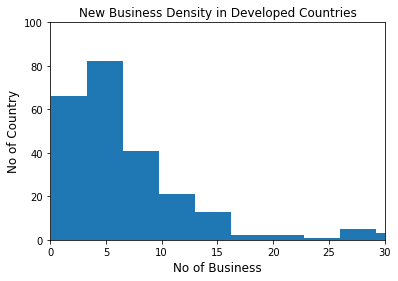

In [28]:
plt.hist((df['New_business_density']), color = '#1f77b4')
plt.xlim(0,30)
plt.ylim(0,100)
plt.xlabel('No of Business',fontsize=12)
plt.ylabel('No of Country', fontsize=12)
plt.title("New Business Density in Developed Countries")
plt.show()

In [30]:
df["New_business_density"].describe()

count    236.000000
mean       6.630313
std        6.099509
min        0.040801
25%        3.148613
50%        4.600214
75%        8.335607
max       32.437461
Name: New_business_density, dtype: float64

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [33]:
df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)

In [34]:
df.head()

,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,Manufacturing_value added_%_of_GDP,Services_value_added_%_of_GDP,Employment_in_industry_%_of_total_employment,GDP_per_capita_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,6215.321000,9.754463e+07,8.434458e+06,106080.000,NaN,5.483257e+11,10.257824,69.301245,22.062000,44599.697569,...,1.58285,68.82,0.2,2913.0,10,NaN,6.0,0.0,11.5,10.047050
1,6154.451000,1.016228e+08,8.625102e+06,34984.864,4.05,6.102081e+11,9.727962,69.788253,22.188999,50566.826596,...,1.62165,75.09,0.3,2588.0,10,NaN,6.0,0.0,11.5,11.153033
2,6283.831000,1.047136e+08,8.236523e+06,12511.867,NaN,5.855809e+11,9.620166,69.790513,22.004000,47286.998493,...,1.62307,78.39,0.3,2415.0,10,NaN,6.0,0.0,11.5,8.867479
3,6615.125000,1.024645e+08,7.671300e+06,NaN,NaN,4.517339e+11,9.152196,71.610784,19.611000,38713.137428,...,1.68250,83.56,0.2,2179.0,10,NaN,6.0,0.0,11.5,8.852136
4,6082.739413,1.015157e+08,7.861006e+06,NaN,3.95,4.669911e+11,9.550935,70.551904,19.209999,39435.839902,...,1.66063,85.00,0.1,2105.0,10,NaN,6.0,0.0,11.5,9.686320


In [35]:
data=imp.fit_transform(df)

In [36]:
print(data)

[[6.21532100e+03 9.75446310e+07 8.43445800e+06 ... 0.00000000e+00
  1.15000000e+01 1.00470502e+01]
 [6.15445100e+03 1.01622807e+08 8.62510200e+06 ... 0.00000000e+00
  1.15000000e+01 1.11530330e+01]
 [6.28383100e+03 1.04713553e+08 8.23652289e+06 ... 0.00000000e+00
  1.15000000e+01 8.86747857e+00]
 ...
 [6.69581128e+03 3.53703280e+07 3.26680000e+07 ... 0.00000000e+00
  2.50000000e+00 8.01314649e+00]
 [5.06299258e+03 3.80949900e+07 3.36670000e+07 ... 0.00000000e+00
  2.50000000e+00 8.57863953e+00]
 [5.19490042e+03 4.04015150e+07 3.66000000e+07 ... 0.00000000e+00
  1.50000000e+00 1.00107885e+01]]


In [37]:
dataset=pd.DataFrame({'Air_freight': data[:, 0], 'Air_passenger': data[:, 1], 'Container_traffic': data[:, 2], 'Railway_transport': data[:, 3],
                       'Logistic_performance': data[:, 4], 'Industry_valueadded': data[:, 5],'Mfg_valueadded': data[:, 6], 'Service_valueadded': data[:, 7],
                       'Emp_in_industry': data[:, 8], 'GDP_per_capita': data[:, 9],'Final_consumption': data[:, 10], 'Primary_completion': data[:, 11],
                       'Edu_attainment': data[:, 12], 'Hightech_export': data[:, 13],'Treadmark_appl': data[:, 14], 'Patent_appl': data[:, 15],
                       'Scientific_journal': data[:, 16], 'R&D_exp': data[:, 17],'Individual_using_internet': data[:, 18], 'Poverty_headcount': data[:, 19],
                      'Listed_companies': data[:, 20],'Business_disclosure': data[:, 21],'Ease_of_doing_business': data[:, 22],
                       'Start_up_procedure': data[:, 23],'Cost_of_business': data[:, 24],
                      'Time_to_start_business': data[:, 25],'New_business_density': data[:, 26]})

In [38]:
dataset.head()

,Air_freight,Air_passenger,Container_traffic,Railway_transport,Logistic_performance,Industry_valueadded,Mfg_valueadded,Service_valueadded,Emp_in_industry,GDP_per_capita,...,R&D_exp,Individual_using_internet,Poverty_headcount,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business,Time_to_start_business,New_business_density
0,6215.321000,9.754463e+07,8.434458e+06,106080.000000,4.018773,5.483257e+11,10.257824,69.301245,22.062000,44599.697569,...,1.58285,68.82,0.2,2913.0,10.0,85.864098,6.0,0.0,11.5,10.047050
1,6154.451000,1.016228e+08,8.625102e+06,34984.864000,4.050000,6.102081e+11,9.727962,69.788253,22.188999,50566.826596,...,1.62165,75.09,0.3,2588.0,10.0,86.057750,6.0,0.0,11.5,11.153033
2,6283.831000,1.047136e+08,8.236523e+06,12511.867000,4.059118,5.855809e+11,9.620166,69.790513,22.004000,47286.998493,...,1.62307,78.39,0.3,2415.0,10.0,85.620366,6.0,0.0,11.5,8.867479
3,6615.125000,1.024645e+08,7.671300e+06,25703.848664,4.105597,4.517339e+11,9.152196,71.610784,19.611000,38713.137428,...,1.68250,83.56,0.2,2179.0,10.0,83.388726,6.0,0.0,11.5,8.852136
4,6082.739413,1.015157e+08,7.861006e+06,29054.860111,3.950000,4.669911e+11,9.550935,70.551904,19.209999,39435.839902,...,1.66063,85.00,0.1,2105.0,10.0,84.685869,6.0,0.0,11.5,9.686320


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 27 columns):
Air_freight                  236 non-null float64
Air_passenger                236 non-null float64
Container_traffic            236 non-null float64
Railway_transport            236 non-null float64
Logistic_performance         236 non-null float64
Industry_valueadded          236 non-null float64
Mfg_valueadded               236 non-null float64
Service_valueadded           236 non-null float64
Emp_in_industry              236 non-null float64
GDP_per_capita               236 non-null float64
Final_consumption            236 non-null float64
Primary_completion           236 non-null float64
Edu_attainment               236 non-null float64
Hightech_export              236 non-null float64
Treadmark_appl               236 non-null float64
Patent_appl                  236 non-null float64
Scientific_journal           236 non-null float64
R&D_exp                      236 non-null flo

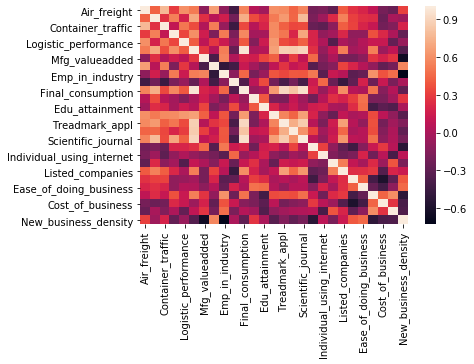

In [40]:
# bulding the correlation matrix
sns.heatmap(dataset.corr())

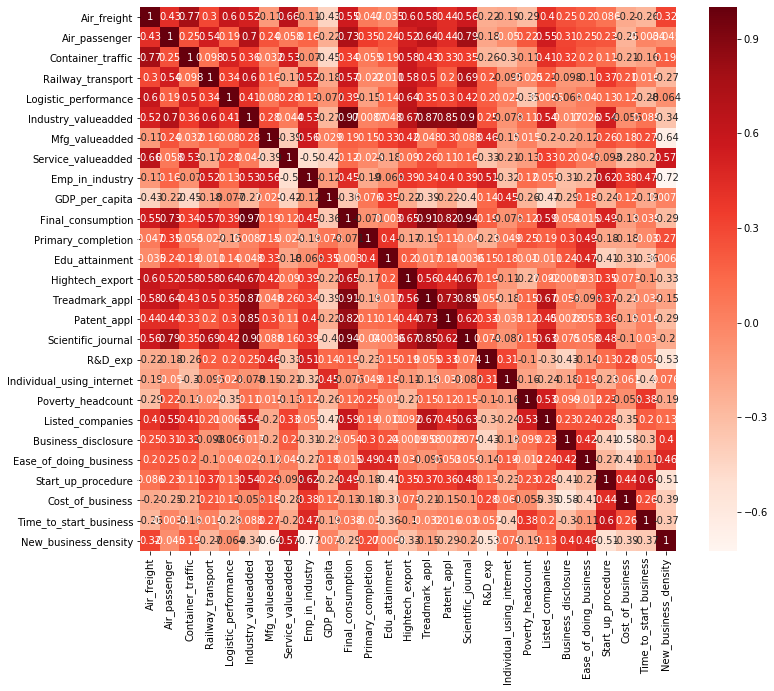

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
print(dataset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business']].corr())

                           Air_freight  Air_passenger  Container_traffic  \
Air_freight                   1.000000       0.432660           0.774448   
Air_passenger                 0.432660       1.000000           0.254171   
Container_traffic             0.774448       0.254171           1.000000   
Railway_transport             0.300053       0.536086           0.098231   
Logistic_performance          0.599247       0.185002           0.502388   
Industry_valueadded           0.520702       0.698184           0.356303   
Mfg_valueadded               -0.110984       0.242367           0.031791   
Service_valueadded            0.661145       0.057873           0.529185   
Emp_in_industry              -0.109102       0.163553          -0.070105   
GDP_per_capita               -0.427981      -0.221403          -0.453447   
Final_consumption             0.550174       0.729753           0.343760   
Primary_completion            0.046629       0.348257           0.054549   
Edu_attainme

In [43]:
#Correlation with output variable
cor_target = abs(cor["New_business_density"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Mfg_valueadded          0.643636
Service_valueadded      0.568598
Emp_in_industry         0.722904
R&D_exp                 0.532375
Start_up_procedure      0.508885
New_business_density    1.000000
Name: New_business_density, dtype: float64

In [44]:
#Correlation with output variable
cor_target = abs(cor["New_business_density"])
#Selecting all correlated features
relevant_features = cor_target[cor_target> -1]
relevant_features

Air_freight                  0.317129
Air_passenger                0.044698
Container_traffic            0.189825
Railway_transport            0.273475
Logistic_performance         0.063706
Industry_valueadded          0.343537
Mfg_valueadded               0.643636
Service_valueadded           0.568598
Emp_in_industry              0.722904
GDP_per_capita               0.007218
Final_consumption            0.291982
Primary_completion           0.268103
Edu_attainment               0.006836
Hightech_export              0.327367
Treadmark_appl               0.153998
Patent_appl                  0.286855
Scientific_journal           0.202009
R&D_exp                      0.532375
Individual_using_internet    0.075682
Poverty_headcount            0.186995
Listed_companies             0.133243
Business_disclosure          0.395702
Ease_of_doing_business       0.457124
Start_up_procedure           0.508885
Cost_of_business             0.389725
Time_to_start_business       0.370330
New_business

In [45]:
x=dataset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business']]
y=dataset['New_business_density']

In [46]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport', 'Industry_valueadded', 'Service_valueadded', 'GDP_per_capita', 'Final_consumption', 'Primary_completion', 'Edu_attainment', 'Hightech_export', 'Treadmark_appl', 'Patent_appl', 'Scientific_journal', 'Individual_using_internet', 'Poverty_headcount', 'Listed_companies', 'Ease_of_doing_business', 'Start_up_procedure']


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [48]:
#no of features
nof_list=np.arange(1,26)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 25
Score with 25 features: 0.889534


In [49]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 25)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Air_freight', 'Air_passenger', 'Container_traffic',
       'Railway_transport', 'Logistic_performance', 'Industry_valueadded',
       'Mfg_valueadded', 'Service_valueadded', 'Emp_in_industry',
       'GDP_per_capita', 'Primary_completion', 'Edu_attainment',
       'Hightech_export', 'Treadmark_appl', 'Patent_appl',
       'Scientific_journal', 'R&D_exp', 'Individual_using_internet',
       'Poverty_headcount', 'Listed_companies', 'Business_disclosure',
       'Ease_of_doing_business', 'Start_up_procedure', 'Cost_of_business',
       'Time_to_start_business'],
      dtype='object')


In [50]:
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     New_business_density   R-squared:                       0.917
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                     92.91
Date:                  Thu, 30 Apr 2020   Prob (F-statistic):           2.64e-99
Time:                          13:10:17   Log-Likelihood:                -467.29
No. Observations:                   236   AIC:                             986.6
Df Residuals:                       210   BIC:                             1077.
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ai

In [51]:
#Code for VIF Calculation

#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y, x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [52]:
#Calculating VIF values using that function
vif_cal(input_data=dataset, dependent_col="New_business_density")

Air_freight  VIF =  15.13
Air_passenger  VIF =  21.83
Container_traffic  VIF =  24.87
Railway_transport  VIF =  10.26
Logistic_performance  VIF =  2.97
Industry_valueadded  VIF =  124.24
Mfg_valueadded  VIF =  9.07
Service_valueadded  VIF =  6.73
Emp_in_industry  VIF =  11.17
GDP_per_capita  VIF =  6.97
Final_consumption  VIF =  343.31
Primary_completion  VIF =  8.35
Edu_attainment  VIF =  12.66
Hightech_export  VIF =  22.48
Treadmark_appl  VIF =  30.87
Patent_appl  VIF =  91.03
Scientific_journal  VIF =  146.46
R&D_exp  VIF =  8.66
Individual_using_internet  VIF =  4.82
Poverty_headcount  VIF =  4.0
Listed_companies  VIF =  19.54
Business_disclosure  VIF =  5.62
Ease_of_doing_business  VIF =  4.66
Start_up_procedure  VIF =  7.44
Cost_of_business  VIF =  3.04
Time_to_start_business  VIF =  4.33


In [53]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
lm=LinearRegression()
lm_lasso=Lasso()
lm_ridge=Ridge()
lm_elastic=ElasticNet()

In [55]:
lm.fit(train_x,train_y)
ypred = lm.predict(test_x)
print ('Coefficients: ', lm.coef_)
print('Variance score: %.2f' % lm.score(x, y))
print('Variance score: %.2f' % lm.score(train_x, train_y))
print('Variance score: %.2f' % lm.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Coefficients:  [-8.60794351e-04  1.13854882e-07  6.15191279e-07  1.27400348e-04
 -1.78100065e+00 -2.63506620e-11  3.44865889e-02  2.63517673e-01
  9.53569536e-02  1.13264882e-04 -1.71872112e-11 -1.56273516e-01
 -7.78540049e-01 -1.00895494e-10  2.44622089e-04  1.61648090e-04
  4.24091197e-04 -4.99558235e-01  5.24040744e-02 -3.25285898e+00
 -5.28957480e-03 -1.46646921e-02  1.74450727e+00 -7.23670021e-01
 -1.88037950e-03  1.98921431e-02]
Variance score: 0.94
Variance score: 0.94
Variance score: 0.93
R2 Score: 0.93


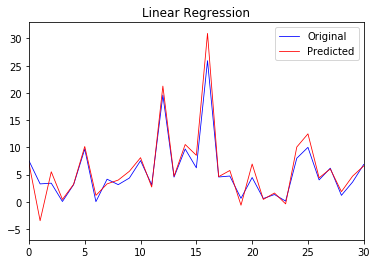

In [56]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Linear Regression")
plt.show()

In [57]:
lm_lasso.fit(train_x,train_y)
ypred = lm_lasso.predict(test_x)
print ('Coefficients: ', lm_lasso.coef_)
print('Variance score: %.2f' % lm_lasso.score(x, y))
print('Variance score: %.2f' % lm_lasso.score(train_x, train_y))
print('Variance score: %.2f' % lm_lasso.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Coefficients:  [ 4.76371363e-04  7.37425126e-08  2.59123354e-07  3.83130706e-05
 -0.00000000e+00 -1.20310811e-11 -1.51505269e-01  9.69477749e-02
 -0.00000000e+00  4.36836425e-05 -1.00396104e-11 -0.00000000e+00
 -2.58899120e-01 -8.54384391e-11  1.41891687e-04  6.57414852e-05
  2.20900607e-04 -0.00000000e+00  2.00083779e-02 -0.00000000e+00
 -3.62867982e-03  0.00000000e+00  8.60656228e-01 -0.00000000e+00
 -3.92047914e-02 -0.00000000e+00]
Variance score: 0.89
Variance score: 0.88
Variance score: 0.91
R2 Score: 0.91


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559.176559323883, tolerance: 0.5561912701903781
  positive)


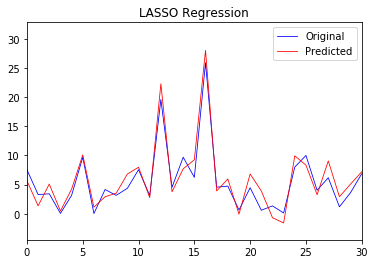

In [58]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("LASSO Regression")
plt.show()

In [59]:
lm_ridge.fit(train_x,train_y)
ypred = lm_ridge.predict(test_x)
print ('Coefficients: ', lm_ridge.coef_)
print('Variance score: %.2f' % lm_ridge.score(x, y))
print('Variance score: %.2f' % lm_ridge.score(train_x, train_y))
print('Variance score: %.2f' % lm_ridge.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Coefficients:  [-8.27318908e-04  1.14271263e-07  6.16389652e-07  1.27325042e-04
 -1.35017972e+00 -2.62193085e-11  3.37246871e-02  2.66321984e-01
  1.16157950e-01  1.13652883e-04 -1.69396729e-11 -1.59729296e-01
 -7.79482821e-01 -1.02217229e-10  2.43539540e-04  1.59543256e-04
  4.17545533e-04 -5.55314366e-01  5.51077140e-02 -2.34899493e+00
 -5.43686025e-03 -3.49396748e-02  1.74994209e+00 -7.29193756e-01
 -5.46931211e-03  1.77315828e-02]
Variance score: 0.94
Variance score: 0.94
Variance score: 0.93
R2 Score: 0.93


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01445e-26): result may not be accurate.
  overwrite_a=True).T


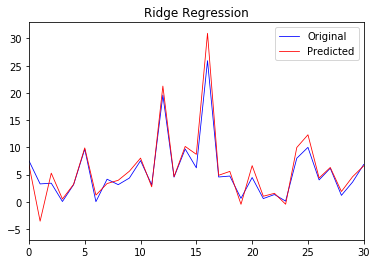

In [60]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Ridge Regression")
plt.show()

In [61]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [62]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.94, MSE:2.22, RMSE:1.49
Alpha:0.0010, R2:0.94, MSE:2.22, RMSE:1.49
Alpha:0.0100, R2:0.94, MSE:2.24, RMSE:1.50
Alpha:0.1000, R2:0.93, MSE:2.48, RMSE:1.57
Alpha:0.3000, R2:0.93, MSE:2.71, RMSE:1.65
Alpha:0.5000, R2:0.92, MSE:2.99, RMSE:1.73
Alpha:0.7000, R2:0.91, MSE:3.27, RMSE:1.81
Alpha:1.0000, R2:0.90, MSE:3.67, RMSE:1.91


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262.1385412442221, tolerance: 0.8742941276457412
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.7957197156344, tolerance: 0.8742941276457412
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.03755581902266, tolerance: 0.8742941276457412
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

In [63]:
elastic=ElasticNet(alpha=0.01).fit(train_x, train_y)
ypred = elastic.predict(test_x)
score = elastic.score(test_x, test_y)
mse = mean_squared_error(test_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.929, MSE:3.18, RMSE:1.78


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.1823680575886, tolerance: 0.5561912701903781
  positive)


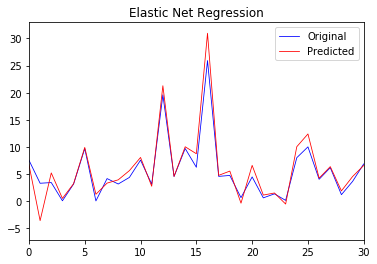

In [64]:
x_ax = range(len(test_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Elastic Net Regression")
plt.show()

In [65]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(train_x, train_y)
print(model.alpha_)
print(model.intercept_)

0.01
-117.86176630790675


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.3919242620953, tolerance: 0.43725443929248525
  tol, rng, random, positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326.58778106415923, tolerance: 0.43725443929248525
  tol, rng, random, positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.61007802646856, tolerance: 0.43725443929248525
  tol, rng, random, positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You 

In [66]:
ypred = model.predict(test_x)
score = model.score(test_x, test_y)
mse = mean_squared_error(test_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.929, MSE:3.18, RMSE:1.78


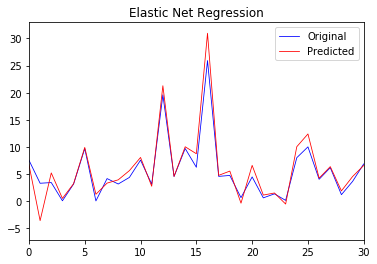

In [67]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Elastic Net Regression")
plt.show()

In [68]:
lm_elastic.fit(train_x,train_y)
print ('Coefficients: ', lm_elastic.coef_)
print('Variance score: %.2f' % lm_elastic.score(x, y))

Coefficients:  [ 3.14674448e-04  8.12082067e-08  2.77736035e-07  5.16986399e-05
 -0.00000000e+00 -1.33119213e-11 -1.73278812e-01  1.26501092e-01
  0.00000000e+00  4.87672920e-05 -1.07575786e-11 -0.00000000e+00
 -3.13749026e-01 -7.96291297e-11  1.48899278e-04  7.70593184e-05
  2.26923549e-04  0.00000000e+00  2.71932333e-02 -0.00000000e+00
 -3.70660812e-03  0.00000000e+00  9.14069918e-01 -0.00000000e+00
 -4.44591335e-02 -0.00000000e+00]
Variance score: 0.90


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.4433725077881, tolerance: 0.5561912701903781
  positive)


In [69]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x, train_y)
ypred=neigh.predict(test_x)
#print ('Coefficients: ', neigh.coef_)
print('Variance score: %.2f' % neigh.score(x, y))
print('Variance score: %.2f' % neigh.score(train_x, train_y))
print('Variance score: %.2f' % neigh.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Variance score: 0.93
Variance score: 0.92
Variance score: 0.95
R2 Score: 0.95


R2:0.947, MSE:2.39, RMSE:1.55


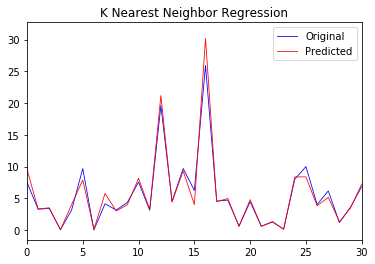

In [70]:
model = neigh.fit(train_x, train_y)
ypred = model.predict(test_x)
score = model.score(test_x, test_y)
mse = mean_squared_error(test_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
x_ax = range(len(test_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim (0,30)
plt.legend()
plt.title("K Nearest Neighbor Regression")
plt.show()

In [71]:
x_norm = (x - x.mean()) / x.std()

In [72]:
y_norm = (y - y.mean()) / y.std()

In [73]:
train_norm_x,test_norm_x,train_norm_y,test_norm_y=train_test_split(x_norm,y_norm,test_size=0.3,random_state=50)

In [74]:
model_lar = linear_model.Lars(n_nonzero_coefs=15)

In [75]:
model_lar.fit(train_norm_x, train_norm_y)
ypred=model_lar.predict(test_norm_x)
#print ('Coefficients: ', neigh.coef_)
print('Variance score: %.2f' % model_lar.score(x_norm, y_norm))
print('Variance score: %.2f' % model_lar.score(train_norm_x, train_norm_y))
print('Variance score: %.2f' % model_lar.score(test_norm_x, test_norm_y))
print('R2 Score: %.2f' % r2_score(test_norm_y, ypred))

Variance score: 0.83
Variance score: 0.82
Variance score: 0.84
R2 Score: 0.84


R2:0.840, MSE:0.20, RMSE:0.45


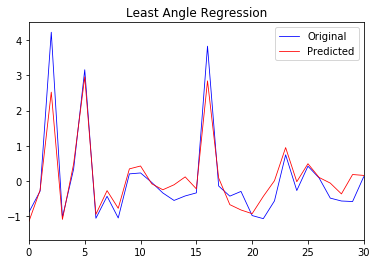

In [76]:
model = model_lar.fit(train_norm_x, train_norm_y)
ypred = model.predict(test_norm_x)
score = model.score(test_norm_x, test_norm_y)
mse = mean_squared_error(test_norm_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
x_ax = range(len(test_norm_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim (0,30)
plt.legend()
plt.title("Least Angle Regression")
plt.show()

In [77]:
model_ARD = linear_model.ARDRegression()

In [78]:
model_ARD.fit(train_norm_x, train_norm_y)
ypred=model_ARD.predict(test_norm_x)
#print ('Coefficients: ', neigh.coef_)
print('Variance score: %.2f' % model_ARD.score(x_norm, y_norm))
print('Variance score: %.2f' % model_ARD.score(train_norm_x, train_norm_y))
print('Variance score: %.2f' % model_ARD.score(test_norm_x, test_norm_y))
print('R2 Score: %.2f' % r2_score(test_norm_y, ypred))

Variance score: 0.93
Variance score: 0.93
Variance score: 0.93
R2 Score: 0.93


R2:0.926, MSE:0.09, RMSE:0.31


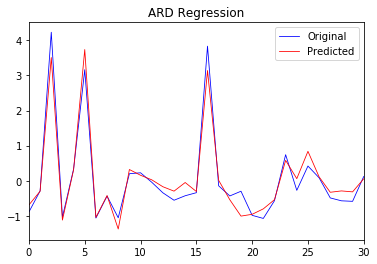

In [79]:
model = model_ARD.fit(train_norm_x, train_norm_y)
ypred = model.predict(test_norm_x)
score = model.score(test_norm_x, test_norm_y)
mse = mean_squared_error(test_norm_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
x_ax = range(len(test_norm_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim (0,30)
plt.legend()
plt.title("ARD Regression")
plt.show()

In [80]:
print("R Square value for Simple Regression Training data is ",np.round(lm.score(train_x, train_y)*100,2))
print("R Square value for Lasso Regression Training data is ",np.round(lm_lasso.score(train_x, train_y)*100,2))
print("R Square value for Ridge Regression Training data is ",np.round(lm_ridge.score(train_x, train_y)*100,2))
print("R Square value for Elastic Net Regression Training data is ",np.round(lm_elastic.score(train_x, train_y)*100,2))
print("R Square value for K Nearest Neighbor Regression Training data is ",np.round(neigh.score(train_x, train_y)*100,2))
print("R Square value for Least Angle Regression Training data is ",np.round(model_lar.score(train_norm_x, train_norm_y)*100,2))
print("R Square value for ARD Regression Training data is ",np.round(model_ARD.score(train_norm_x, train_norm_y)*100,2))

R Square value for Simple Regression Training data is  93.92
R Square value for Lasso Regression Training data is  88.39
R Square value for Ridge Regression Training data is  93.88
R Square value for Elastic Net Regression Training data is  89.26
R Square value for K Nearest Neighbor Regression Training data is  91.85
R Square value for Least Angle Regression Training data is  81.57
R Square value for ARD Regression Training data is  93.43


In [81]:
print("R Square value for Simple Regression Test data is ",np.round(lm.score(test_x, test_y)*100,2))
print("R Square value for Lasso Regression Test data is ",np.round(lm_lasso.score(test_x, test_y)*100,2))
print("R Square value for Ridge Regression Test data is ",np.round(lm_ridge.score(test_x, test_y)*100,2))
print("R Square value for Elastic Net Regression Test data is ",np.round(lm_elastic.score(test_x, test_y)*100,2))
print("R Square value for K Nearest Neighbor Regression Test data is ",np.round(neigh.score(test_x, test_y)*100,2))
print("R Square value for Least Angle Regression Test data is ",np.round(model_lar.score(test_norm_x, test_norm_y)*100,2))
print("R Square value for ARD Regression Test data is ",np.round(model_ARD.score(test_norm_x, test_norm_y)*100,2))

R Square value for Simple Regression Test data is  92.92
R Square value for Lasso Regression Test data is  90.54
R Square value for Ridge Regression Test data is  93.04
R Square value for Elastic Net Regression Test data is  91.23
R Square value for K Nearest Neighbor Regression Test data is  94.66
R Square value for Least Angle Regression Test data is  84.04
R Square value for ARD Regression Test data is  92.61


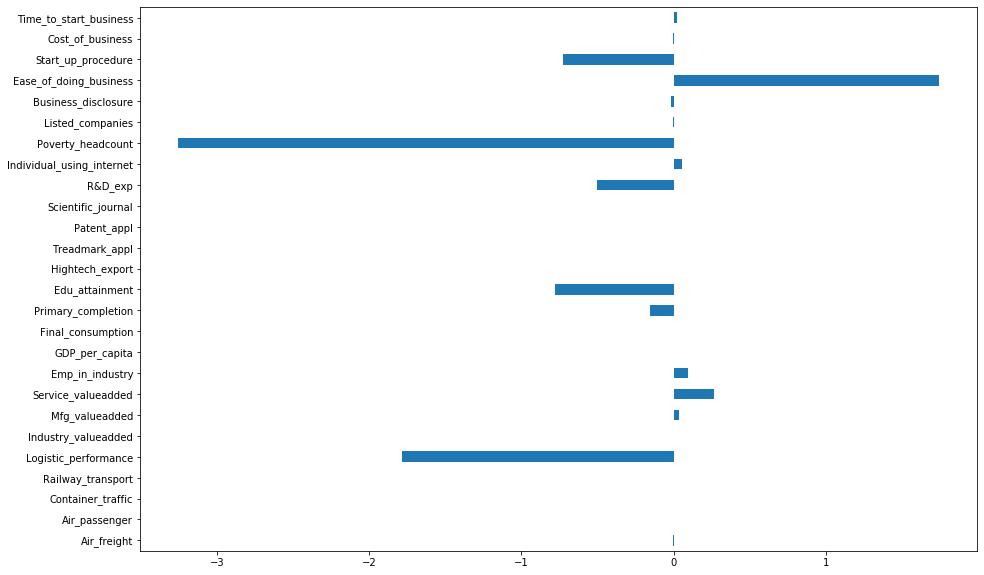

In [82]:
plt.figure(figsize=(15,10))
ft_importance_lm=pd.Series(lm.coef_,index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

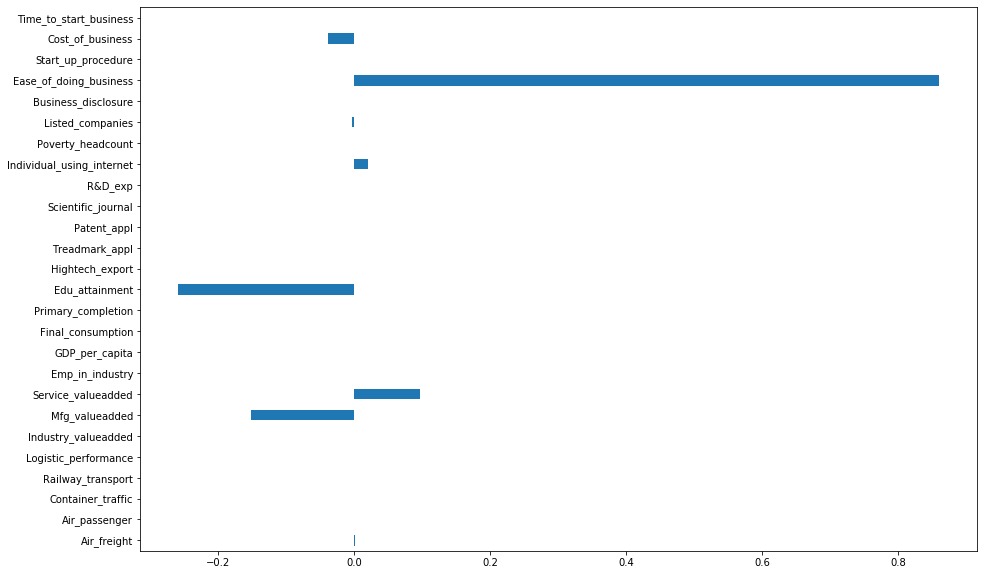

In [83]:
plt.figure(figsize=(15,10))
ft_importance_lm_lasso=pd.Series(lm_lasso.coef_,index=x.columns)
ft_importance_lm_lasso.plot(kind='barh')
plt.show()

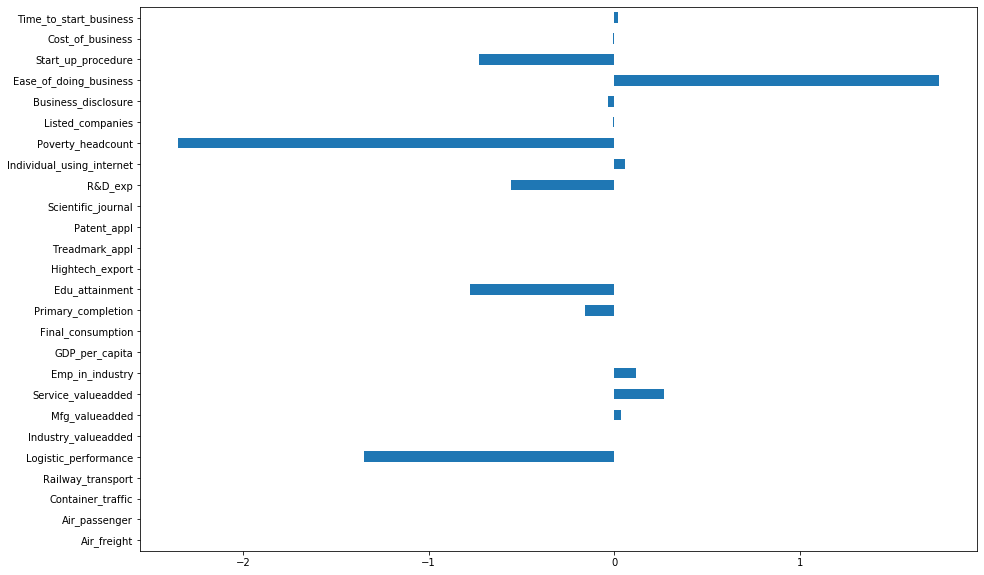

In [84]:
plt.figure(figsize=(15,10))
ft_importance_lm_ridge=pd.Series(lm_ridge.coef_,index=x.columns)
ft_importance_lm_ridge.plot(kind='barh')
plt.show()

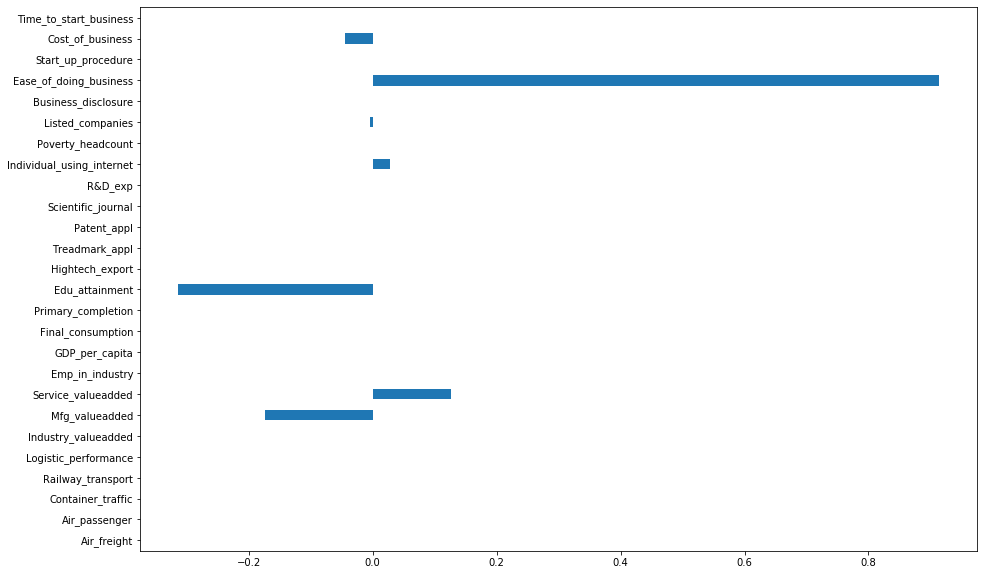

In [85]:
plt.figure(figsize=(15,10))
ft_importance_lm_elastic=pd.Series(lm_elastic.coef_,index=x.columns)
ft_importance_lm_elastic.plot(kind='barh')
plt.show()

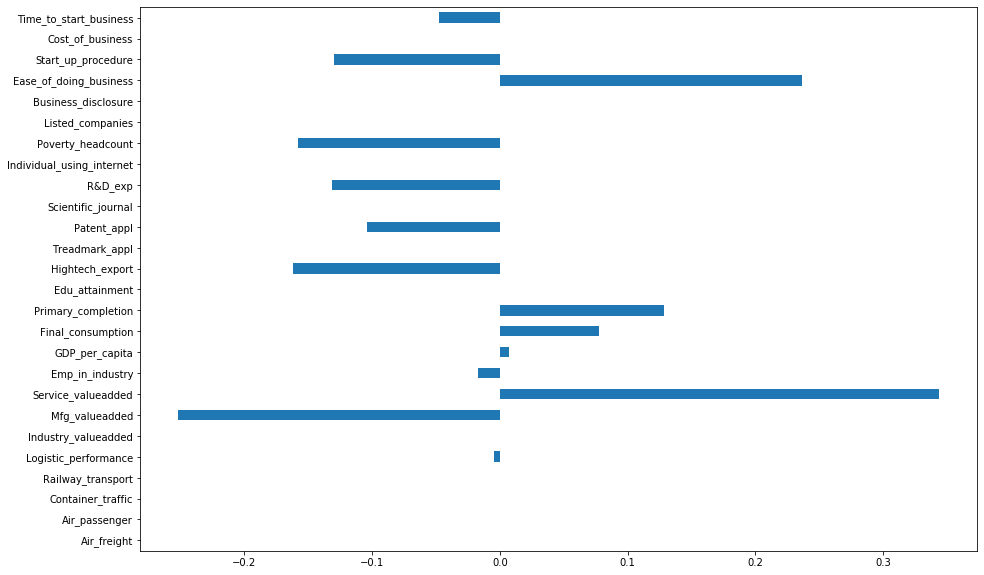

In [86]:
plt.figure(figsize=(15,10))
ft_importance_lm_LAR=pd.Series(model_lar.coef_,index=x.columns)
ft_importance_lm_LAR.plot(kind='barh')
plt.show()

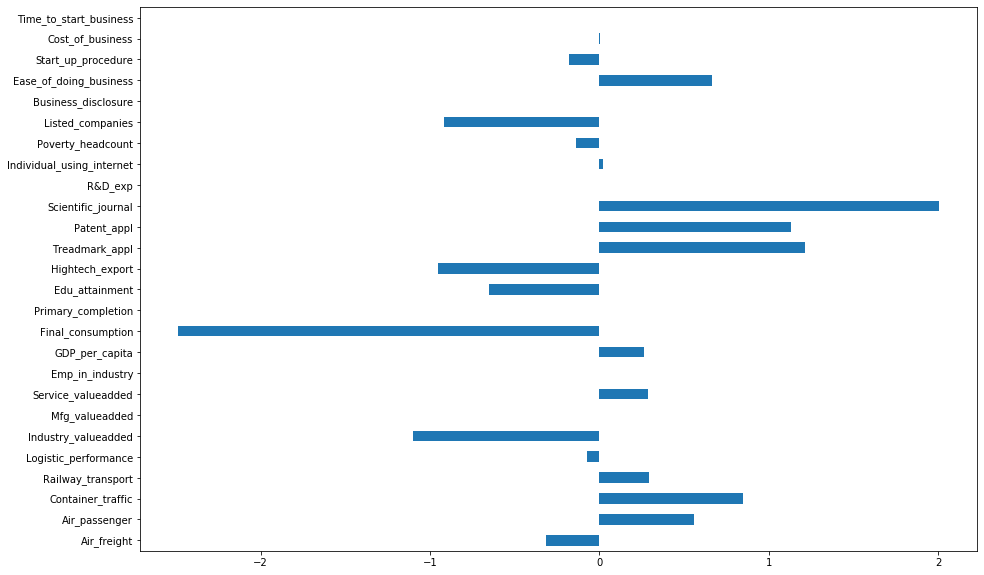

In [87]:
plt.figure(figsize=(15,10))
ft_importance_lm_ARD=pd.Series(model_ARD.coef_,index=x.columns)
ft_importance_lm_ARD.plot(kind='barh')
plt.show()

In [88]:
x_norm = (x - x.mean()) / x.std()

In [89]:
y_norm = (y - y.mean()) / y.std()

In [90]:
train_x,test_x,train_y,test_y=train_test_split(x_norm,y_norm,test_size=0.3,random_state=50)

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
 from sklearn.model_selection import cross_val_score

In [93]:
regressor = DecisionTreeRegressor(random_state=0)

In [94]:
regressor.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [95]:
ypred = regressor.predict(test_x)
score_train = regressor.score(train_x, train_y)
score_test = regressor.score(test_x, test_y)
print("R Square value for Decision Tree Regression Training data is ",(score_train))
print("R Square value for Decision Tree Regression Test data is ",(score_test))
print("R Square value for Decision Tree Regression Test data is ",(r2_score(test_y, ypred)))

R Square value for Decision Tree Regression Training data is  0.9999999962385442
R Square value for Decision Tree Regression Test data is  0.8428111645508249
R Square value for Decision Tree Regression Test data is  0.8428111645508249


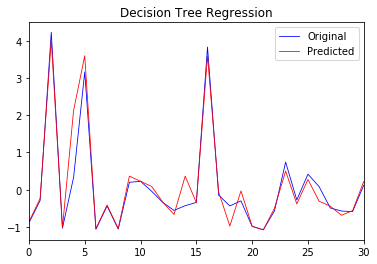

In [96]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Decision Tree Regression")
plt.show()

In [97]:
predictions = regressor.predict(test_x)

In [98]:
errors = abs(predictions - test_y)

In [99]:
print('Mean Absolute Error:', round(np.mean(errors), 2), )

Mean Absolute Error: 0.22


In [100]:
cross_val_score(regressor, x, y, cv=10)

array([  0.30246492,   0.13298906,  -0.1080877 ,  -1.46295919,
       -25.58217601,   0.46409823,  -3.31394605,  -0.66741167,
        -0.66344006,  -0.49108292])

In [101]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.01 %.


In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor( n_estimators = 100, random_state = 0)
# Train the model on training data
rf.fit(train_x, train_y);

In [104]:
ypred = rf.predict(test_x)
score_train = rf.score(train_x, train_y)
score_test = rf.score(test_x, test_y)
print("R Square value for Random Forest Regression Training data is ",(score_train))
print("R Square value for Random Forest Regression Test data is ",(score_test))
print("R Square value for Random Forest Regression Test data is ",(r2_score(test_y, ypred)))

R Square value for Random Forest Regression Training data is  0.9860757409712375
R Square value for Random Forest Regression Test data is  0.9349694753861005
R Square value for Random Forest Regression Test data is  0.9349694753861005


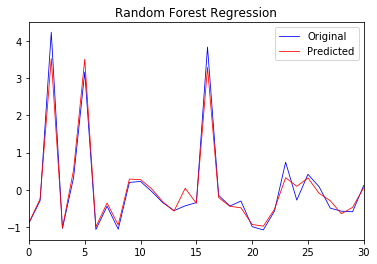

In [105]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Random Forest Regression")
plt.show()

In [106]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2),)

Mean Absolute Error: 0.18


In [107]:
cross_val_score(rf, x, y, cv=10)

array([ -0.39174365,   0.82642206,   0.32432203,  -0.7506495 ,
       -32.58397903,   0.41306115,   0.45693252,  -0.07769602,
        -0.33177906,  -0.70655691])

In [108]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.54 %.


### Study about Developing Countries

In [109]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developing_Country_Data_WB.xlsx", None)

In [110]:
df.keys()

odict_keys(['ARG', 'BGD', 'BGR', 'BRA', 'CHN', 'IDN', 'IND', 'IRN', 'KWT', 'MEX', 'MYS', 'PHL', 'POL', 'QAT', 'ROU', 'RUS', 'THA', 'TUR', 'VEN', 'ZAF', 'TOTAL', 'Sheet1'])

In [111]:
df = pd.read_excel("D:/Phd-IIM Raipur/1st Year Mini Dissertation/Data Set/World Bank/Final Data/Developing_Country_Data_WB.xlsx", sheet_name='Sheet1')

In [112]:
df.head()

,Country,Country_Code,Category,Year,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,Argentina,ARG,Developing,2006,124.583000,6.611915e+06,1.757990e+06,NaN,NaN,6.791435e+10,...,0.45216,20.927202,3.2,101.0,7,NaN,13.0,18.8,29.5,0.240650
1,Argentina,ARG,Developing,2007,132.675000,7.036784e+06,1.874259e+06,NaN,2.81,7.882717e+10,...,0.46007,25.946633,2.6,106.0,7,NaN,13.0,15.9,29.5,0.240467
2,Argentina,ARG,Developing,2008,131.685000,6.147290e+06,1.997146e+06,NaN,NaN,9.499019e+10,...,0.47055,28.112623,2.6,107.0,7,NaN,14.0,12.4,30.0,0.237290
3,Argentina,ARG,Developing,2009,111.663000,5.694547e+06,1.626835e+06,NaN,NaN,8.419046e+10,...,0.58398,34.000000,2.5,101.0,7,NaN,14.0,9.8,25.0,0.189667
4,Argentina,ARG,Developing,2010,193.301254,9.025035e+06,1.992124e+06,NaN,2.75,1.070031e+11,...,0.56104,45.000000,2.2,101.0,7,NaN,14.0,9.1,24.5,0.207609


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 31 columns):
Country                                           185 non-null object
Country_Code                                      185 non-null object
Category                                          185 non-null object
Year                                              185 non-null int64
Air_freight_million_ton_km                        185 non-null float64
Air_passengers_carried                            185 non-null float64
Container_port_traffic_TEU                        183 non-null float64
Railways_goods_trans_million_ton-km               89 non-null float64
Logistic_performance                              87 non-null float64
Industry_value_added_current_USD                  179 non-null float64
Manufacturing_value added_%_of_GDP                184 non-null float64
Services_value_added_%_of_GDP                     179 non-null float64
Employment_in_industry_%_of_total_employment      

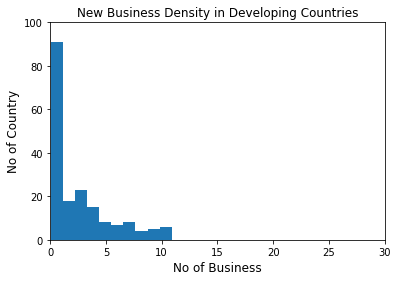

In [114]:
plt.hist((df['New_business_density']), color = '#1f77b4')
plt.xlim(0,30)
plt.ylim(0,100)
plt.xlabel('No of Business',fontsize=12)
plt.ylabel('No of Country', fontsize=12)
plt.title("New Business Density in Developing Countries")
plt.show()

In [115]:
df["New_business_density"].describe()

count    185.000000
mean       2.487582
std        2.837736
min        0.041292
25%        0.326716
50%        1.178486
75%        3.951467
max       10.911789
Name: New_business_density, dtype: float64

In [116]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [117]:
df = df.drop(df.columns[[0, 1, 2, 3]], axis=1)

In [118]:
df.head()

,Air_freight_million_ton_km,Air_passengers_carried,Container_port_traffic_TEU,Railways_goods_trans_million_ton-km,Logistic_performance,Industry_value_added_current_USD,Manufacturing_value added_%_of_GDP,Services_value_added_%_of_GDP,Employment_in_industry_%_of_total_employment,GDP_per_capita_current_USD,...,Research_and_development_expenditure_%_of_GDP,Individuals_using_the_Internet_%_of_population,Poverty_headcount_ratio,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business_start_up,Time_to_start_business,New_business_density
0,124.583000,6.611915e+06,1.757990e+06,NaN,NaN,6.791435e+10,17.877794,48.749133,23.673000,5919.012037,...,0.45216,20.927202,3.2,101.0,7,NaN,13.0,18.8,29.5,0.240650
1,132.675000,7.036784e+06,1.874259e+06,NaN,2.81,7.882717e+10,17.047415,49.508331,23.847000,7245.448317,...,0.46007,25.946633,2.6,106.0,7,NaN,13.0,15.9,29.5,0.240467
2,131.685000,6.147290e+06,1.997146e+06,NaN,NaN,9.499019e+10,16.538366,50.255192,24.021000,9020.873098,...,0.47055,28.112623,2.6,107.0,7,NaN,14.0,12.4,30.0,0.237290
3,111.663000,5.694547e+06,1.626835e+06,NaN,NaN,8.419046e+10,15.583777,53.306001,23.190001,8225.137176,...,0.58398,34.000000,2.5,101.0,7,NaN,14.0,9.8,25.0,0.189667
4,193.301254,9.025035e+06,1.992124e+06,NaN,2.75,1.070031e+11,15.844861,51.495180,23.340000,10385.964432,...,0.56104,45.000000,2.2,101.0,7,NaN,14.0,9.1,24.5,0.207609


In [119]:
data=imp.fit_transform(df)

In [120]:
print(data)

[[1.24583000e+02 6.61191500e+06 1.75799000e+06 ... 1.88000000e+01
  2.95000000e+01 2.40650412e-01]
 [1.32675000e+02 7.03678400e+06 1.87425900e+06 ... 1.59000000e+01
  2.95000000e+01 2.40466755e-01]
 [1.31685000e+02 6.14729000e+06 1.99714600e+06 ... 1.24000000e+01
  3.00000000e+01 2.37290147e-01]
 ...
 [1.04273626e+03 1.70266432e+07 4.56799300e+06 ... 0.00000000e+00
  4.60000000e+01 6.57481813e+00]
 [8.92734324e+02 1.88828980e+07 4.66230000e+06 ... 0.00000000e+00
  4.60000000e+01 8.67781982e+00]
 [7.67271186e+02 1.97449320e+07 4.45400000e+06 ... 0.00000000e+00
  4.50000000e+01 1.02077982e+01]]


In [121]:
 dataset=pd.DataFrame({'Air_freight': data[:, 0], 'Air_passenger': data[:, 1], 'Container_traffic': data[:, 2], 'Railway_transport': data[:, 3],
                       'Logistic_performance': data[:, 4], 'Industry_valueadded': data[:, 5],'Mfg_valueadded': data[:, 6], 'Service_valueadded': data[:, 7],
                       'Emp_in_industry': data[:, 8], 'GDP_per_capita': data[:, 9],'Final_consumption': data[:, 10], 'Primary_completion': data[:, 11],
                       'Edu_attainment': data[:, 12], 'Hightech_export': data[:, 13],'Treadmark_appl': data[:, 14], 'Patent_appl': data[:, 15],
                       'Scientific_journal': data[:, 16], 'R&D_exp': data[:, 17],'Individual_using_internet': data[:, 18], 'Poverty_headcount': data[:, 19],
                      'Listed_companies': data[:, 20],'Business_disclosure': data[:, 21],'Ease_of_doing_business': data[:, 22],
                       'Start_up_procedure': data[:, 23],'Cost_of_business': data[:, 24],
                      'Time_to_start_business': data[:, 25],'New_business_density': data[:, 26]})

In [122]:
dataset.head()

,Air_freight,Air_passenger,Container_traffic,Railway_transport,Logistic_performance,Industry_valueadded,Mfg_valueadded,Service_valueadded,Emp_in_industry,GDP_per_capita,...,R&D_exp,Individual_using_internet,Poverty_headcount,Listed_companies,Business_disclosure,Ease_of_doing_business,Start_up_procedure,Cost_of_business,Time_to_start_business,New_business_density
0,124.583000,6.611915e+06,1.757990e+06,-178589.291452,2.817401,6.791435e+10,17.877794,48.749133,23.673000,5919.012037,...,0.45216,20.927202,3.2,101.0,7.0,44.868393,13.0,18.8,29.5,0.240650
1,132.675000,7.036784e+06,1.874259e+06,-222738.773765,2.810000,7.882717e+10,17.047415,49.508331,23.847000,7245.448317,...,0.46007,25.946633,2.6,106.0,7.0,45.589215,13.0,15.9,29.5,0.240467
2,131.685000,6.147290e+06,1.997146e+06,-324623.482676,2.874710,9.499019e+10,16.538366,50.255192,24.021000,9020.873098,...,0.47055,28.112623,2.6,107.0,7.0,42.192366,14.0,12.4,30.0,0.237290
3,111.663000,5.694547e+06,1.626835e+06,-300597.648005,2.871134,8.419046e+10,15.583777,53.306001,23.190001,8225.137176,...,0.58398,34.000000,2.5,101.0,7.0,45.069923,14.0,9.8,25.0,0.189667
4,193.301254,9.025035e+06,1.992124e+06,-356834.545588,2.750000,1.070031e+11,15.844861,51.495180,23.340000,10385.964432,...,0.56104,45.000000,2.2,101.0,7.0,48.402036,14.0,9.1,24.5,0.207609


In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 27 columns):
Air_freight                  185 non-null float64
Air_passenger                185 non-null float64
Container_traffic            185 non-null float64
Railway_transport            185 non-null float64
Logistic_performance         185 non-null float64
Industry_valueadded          185 non-null float64
Mfg_valueadded               185 non-null float64
Service_valueadded           185 non-null float64
Emp_in_industry              185 non-null float64
GDP_per_capita               185 non-null float64
Final_consumption            185 non-null float64
Primary_completion           185 non-null float64
Edu_attainment               185 non-null float64
Hightech_export              185 non-null float64
Treadmark_appl               185 non-null float64
Patent_appl                  185 non-null float64
Scientific_journal           185 non-null float64
R&D_exp                      185 non-null flo

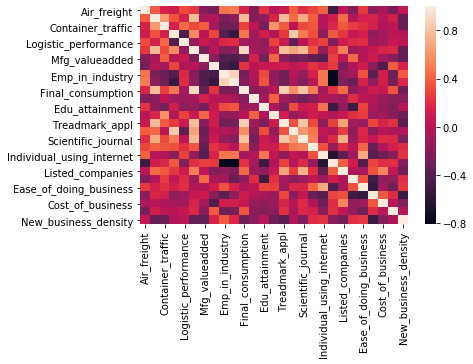

In [124]:
# data visualization
# bulding the correlation matrix
sns.heatmap(dataset.corr())

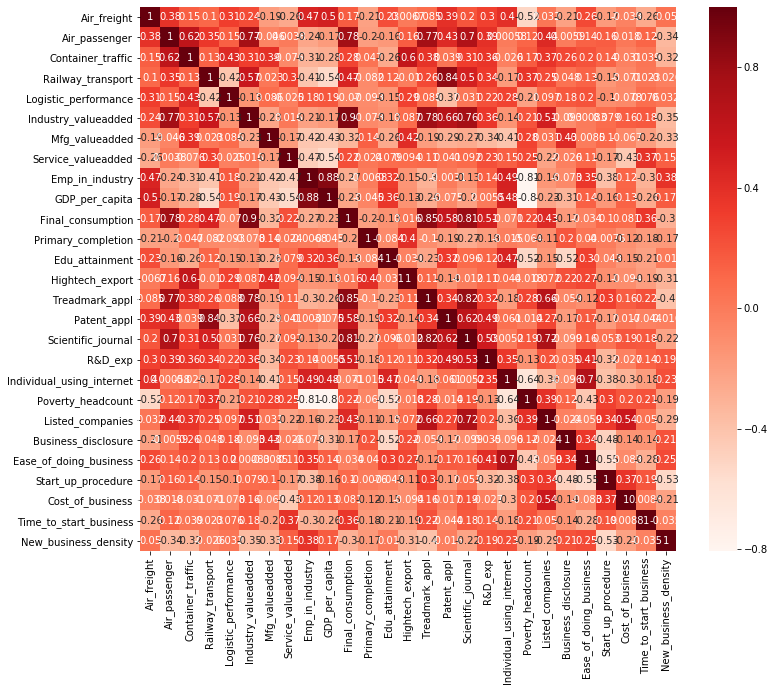

In [125]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [126]:
print(dataset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business']].corr())

                           Air_freight  Air_passenger  Container_traffic  \
Air_freight                   1.000000       0.382523           0.149313   
Air_passenger                 0.382523       1.000000           0.621709   
Container_traffic             0.149313       0.621709           1.000000   
Railway_transport             0.104311       0.348623           0.132611   
Logistic_performance          0.311182       0.145214           0.430311   
Industry_valueadded           0.243757       0.769716           0.311645   
Mfg_valueadded               -0.191354      -0.046214           0.391900   
Service_valueadded           -0.255579       0.003839          -0.075986   
Emp_in_industry               0.467014      -0.240734          -0.308616   
GDP_per_capita                0.501456      -0.172827          -0.282855   
Final_consumption             0.165206       0.780154           0.275709   
Primary_completion           -0.211075      -0.195283           0.047075   
Edu_attainme

In [127]:
#Correlation with output variable
cor_target = abs(cor["New_business_density"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Start_up_procedure      0.528763
New_business_density    1.000000
Name: New_business_density, dtype: float64

In [128]:
#Correlation with output variable
cor_target = abs(cor["New_business_density"])
#Selecting all correlated features
relevant_features = cor_target[cor_target> -1]
relevant_features

Air_freight                  0.050351
Air_passenger                0.339680
Container_traffic            0.317652
Railway_transport            0.026195
Logistic_performance         0.031718
Industry_valueadded          0.352842
Mfg_valueadded               0.331170
Service_valueadded           0.147757
Emp_in_industry              0.377145
GDP_per_capita               0.172062
Final_consumption            0.297024
Primary_completion           0.166007
Edu_attainment               0.010222
Hightech_export              0.306625
Treadmark_appl               0.396537
Patent_appl                  0.016021
Scientific_journal           0.220897
R&D_exp                      0.194468
Individual_using_internet    0.230551
Poverty_headcount            0.187371
Listed_companies             0.287120
Business_disclosure          0.212802
Ease_of_doing_business       0.246531
Start_up_procedure           0.528763
Cost_of_business             0.212820
Time_to_start_business       0.034730
New_business

In [129]:
x=dataset[['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport',
                       'Logistic_performance', 'Industry_valueadded','Mfg_valueadded', 'Service_valueadded',
                       'Emp_in_industry', 'GDP_per_capita','Final_consumption', 'Primary_completion',
                       'Edu_attainment', 'Hightech_export','Treadmark_appl', 'Patent_appl',
                       'Scientific_journal', 'R&D_exp','Individual_using_internet', 'Poverty_headcount',
                      'Listed_companies','Business_disclosure','Ease_of_doing_business',
                       'Start_up_procedure','Cost_of_business',
                      'Time_to_start_business']]
y=dataset['New_business_density']

In [130]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Air_freight', 'Air_passenger', 'Container_traffic', 'Railway_transport', 'Industry_valueadded', 'Mfg_valueadded', 'GDP_per_capita', 'Hightech_export', 'Treadmark_appl', 'Individual_using_internet', 'Poverty_headcount', 'Listed_companies', 'Ease_of_doing_business', 'Start_up_procedure', 'Cost_of_business', 'Time_to_start_business']


C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [131]:
#no of features
nof_list=np.arange(1,26)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 25
Score with 25 features: 0.768020


In [132]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 25)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Air_freight', 'Air_passenger', 'Container_traffic',
       'Railway_transport', 'Logistic_performance', 'Industry_valueadded',
       'Mfg_valueadded', 'Service_valueadded', 'Emp_in_industry',
       'GDP_per_capita', 'Primary_completion', 'Edu_attainment',
       'Hightech_export', 'Treadmark_appl', 'Patent_appl',
       'Scientific_journal', 'R&D_exp', 'Individual_using_internet',
       'Poverty_headcount', 'Listed_companies', 'Business_disclosure',
       'Ease_of_doing_business', 'Start_up_procedure', 'Cost_of_business',
       'Time_to_start_business'],
      dtype='object')


In [133]:
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     New_business_density   R-squared:                       0.844
Model:                              OLS   Adj. R-squared:                  0.820
Method:                   Least Squares   F-statistic:                     34.43
Date:                  Thu, 30 Apr 2020   Prob (F-statistic):           1.24e-51
Time:                          13:15:06   Log-Likelihood:                -283.06
No. Observations:                   185   AIC:                             618.1
Df Residuals:                       159   BIC:                             701.8
Df Model:                            25                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Ai

In [134]:
#Code for VIF Calculation

#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y, x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [135]:
#Calculating VIF values using that function
vif_cal(input_data=dataset, dependent_col="New_business_density")

Air_freight  VIF =  12.26
Air_passenger  VIF =  27.25
Container_traffic  VIF =  16.42
Railway_transport  VIF =  88.36
Logistic_performance  VIF =  3.78
Industry_valueadded  VIF =  26.72
Mfg_valueadded  VIF =  8.56
Service_valueadded  VIF =  11.76
Emp_in_industry  VIF =  18.92
GDP_per_capita  VIF =  61.08
Final_consumption  VIF =  106.72
Primary_completion  VIF =  1.35
Edu_attainment  VIF =  12.54
Hightech_export  VIF =  6.28
Treadmark_appl  VIF =  56.94
Patent_appl  VIF =  46.47
Scientific_journal  VIF =  34.68
R&D_exp  VIF =  6.97
Individual_using_internet  VIF =  25.1
Poverty_headcount  VIF =  20.24
Listed_companies  VIF =  21.76
Business_disclosure  VIF =  8.3
Ease_of_doing_business  VIF =  35.19
Start_up_procedure  VIF =  10.44
Cost_of_business  VIF =  6.48
Time_to_start_business  VIF =  4.78


In [136]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)

In [137]:
lm.fit(train_x,train_y)
ypred = lm.predict(test_x)
print ('Coefficients: ', lm.coef_)
print('Variance score: %.2f' % lm.score(x, y))
print('Variance score: %.2f' % lm.score(train_x, train_y))
print('Variance score: %.2f' % lm.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Coefficients:  [ 7.84925623e-04 -1.14180280e-07  3.20455110e-07  5.86908224e-06
 -1.22193998e+00 -2.56549437e-11 -3.29296411e-01  4.89911946e-02
 -9.93010260e-03  5.33753628e-04 -1.89024204e-13 -4.26064177e-02
 -2.66503549e-02 -5.39652447e-11  1.01319021e-04 -1.65198173e-04
 -3.52637824e-05  6.44330316e-01 -2.61608480e-01  6.09953449e-01
 -1.86163678e-03  1.38275029e-01  7.64469154e-01  4.28245704e-01
 -5.93497972e-02  8.84746169e-02]
Variance score: 0.85
Variance score: 0.89
Variance score: 0.66
R2 Score: 0.66


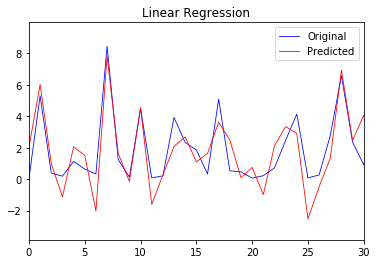

In [138]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Linear Regression")
plt.show()

In [139]:
lm_lasso.fit(train_x,train_y)
ypred = lm_lasso.predict(test_x)
print ('Coefficients: ', lm_lasso.coef_)
print('Variance score: %.2f' % lm_lasso.score(x, y))
print('Variance score: %.2f' % lm_lasso.score(train_x, train_y))
print('Variance score: %.2f' % lm_lasso.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Coefficients:  [-3.53608323e-04 -4.63343845e-09  1.50023171e-08  9.86060971e-06
  0.00000000e+00 -2.54125357e-11 -1.95835877e-01  1.61359211e-02
  0.00000000e+00  2.79686606e-04  4.05304565e-12 -7.96400486e-02
 -2.25706061e-01 -2.56269533e-11  1.96026594e-05 -5.49351242e-04
 -4.97651627e-05  0.00000000e+00 -3.97353665e-02  0.00000000e+00
  1.02890489e-03  0.00000000e+00  1.49578442e-01 -0.00000000e+00
 -2.50600192e-02  5.75538565e-03]
Variance score: 0.73
Variance score: 0.78
Variance score: 0.50
R2 Score: 0.50


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224.66165012486283, tolerance: 0.11838411331385483
  positive)


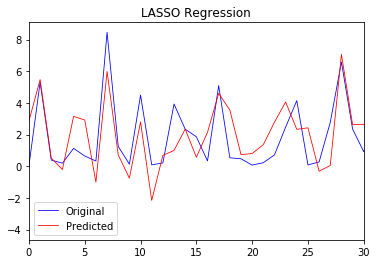

In [140]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("LASSO Regression")
plt.show()

In [141]:
lm_ridge.fit(train_x,train_y)
ypred = lm_ridge.predict(test_x)
print ('Coefficients: ', lm_ridge.coef_)
print('Variance score: %.2f' % lm_ridge.score(x, y))
print('Variance score: %.2f' % lm_ridge.score(train_x, train_y))
print('Variance score: %.2f' % lm_ridge.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Coefficients:  [ 7.47600806e-04 -1.12551530e-07  3.18269334e-07  5.94105625e-06
 -9.18188070e-01 -2.60384261e-11 -3.31979094e-01  4.81758465e-02
 -3.72817573e-03  5.27393712e-04  1.45315185e-13 -4.37894173e-02
 -3.08881180e-02 -5.33266455e-11  9.92210461e-05 -1.60373069e-04
 -3.68617232e-05  3.83231775e-01 -2.58495923e-01  6.00104461e-01
 -1.81236232e-03  1.36561968e-01  7.55929783e-01  4.25962365e-01
 -5.87606978e-02  8.57935284e-02]
Variance score: 0.85
Variance score: 0.89
Variance score: 0.67
R2 Score: 0.67


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48336e-26): result may not be accurate.
  overwrite_a=True).T


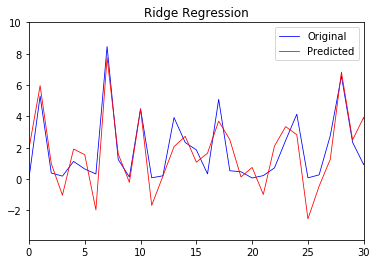

In [142]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Ridge Regression")
plt.show()

In [143]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [144]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.87, MSE:1.07, RMSE:1.03
Alpha:0.0010, R2:0.87, MSE:1.07, RMSE:1.03
Alpha:0.0100, R2:0.87, MSE:1.07, RMSE:1.04
Alpha:0.1000, R2:0.86, MSE:1.13, RMSE:1.06
Alpha:0.3000, R2:0.84, MSE:1.31, RMSE:1.14
Alpha:0.5000, R2:0.82, MSE:1.42, RMSE:1.19
Alpha:0.7000, R2:0.81, MSE:1.52, RMSE:1.23
Alpha:1.0000, R2:0.79, MSE:1.68, RMSE:1.30


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.76152431447532, tolerance: 0.14817050128320455
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.18275722346414, tolerance: 0.14817050128320455
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.92204222687974, tolerance: 0.14817050128320455
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

In [145]:
elastic=ElasticNet(alpha=0.01).fit(train_x, train_y)
ypred = elastic.predict(test_x)
score = elastic.score(test_x, test_y)
mse = mean_squared_error(test_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.668, MSE:1.66, RMSE:1.29


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.19407926581532, tolerance: 0.11838411331385483
  positive)


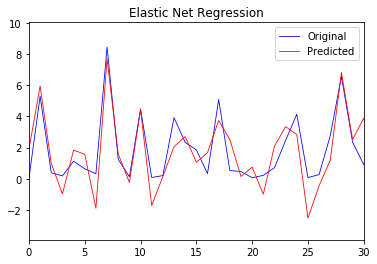

In [146]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Elastic Net Regression")
plt.show()

In [147]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(train_x, train_y)
print(model.alpha_)
print(model.intercept_)

0.01
-32.73763107712779


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128.19333747674597, tolerance: 0.10282917130066067
  tol, rng, random, positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.27370212709987, tolerance: 0.10282917130066067
  tol, rng, random, positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.41032405815068, tolerance: 0.10282917130066067
  tol, rng, random, positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You 

In [148]:
ypred = model.predict(test_x)
score = model.score(test_x, test_y)
mse = mean_squared_error(test_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.668, MSE:1.66, RMSE:1.29


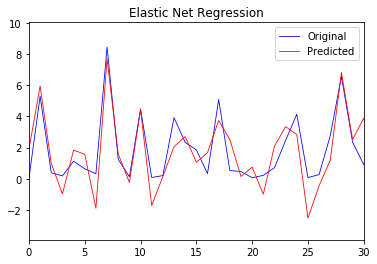

In [149]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Elastic Net Regression")
plt.show()

In [150]:
lm_elastic.fit(train_x,train_y)
print ('Coefficients: ', lm_elastic.coef_)
print('Variance score: %.2f' % lm_elastic.score(x, y))

Coefficients:  [-2.30540355e-04 -1.68379788e-08  7.84210611e-08  9.08713781e-06
 -0.00000000e+00 -2.47584930e-11 -2.24541027e-01  4.03685161e-02
  2.67093380e-02  3.04377623e-04  3.05795999e-12 -9.60073154e-02
 -1.88317655e-01 -3.21081057e-11  3.44450845e-05 -4.68864822e-04
 -6.19696105e-05  0.00000000e+00 -7.38353742e-02  8.85157883e-02
  6.82202723e-04  0.00000000e+00  2.33532406e-01 -0.00000000e+00
 -2.87623136e-02  1.77121128e-02]
Variance score: 0.77


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.09648420292217, tolerance: 0.11838411331385483
  positive)


In [151]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x, train_y)
#print ('Coefficients: ', neigh.coef_)
print('Variance score: %.2f' % neigh.score(x, y))
print('Variance score: %.2f' % neigh.score(train_x, train_y))
print('Variance score: %.2f' % neigh.score(test_x, test_y))
print('R2 Score: %.2f' % r2_score(test_y, ypred))

Variance score: 0.68
Variance score: 0.73
Variance score: 0.42
R2 Score: 0.67


R2:0.417, MSE:2.91, RMSE:1.71


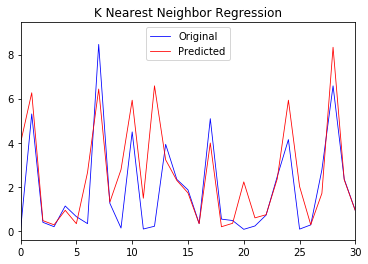

In [152]:
model = neigh.fit(train_x, train_y)
ypred = model.predict(test_x)
score = model.score(test_x, test_y)
mse = mean_squared_error(test_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
x_ax = range(len(test_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim (0,30)
plt.legend()
plt.title("K Nearest Neighbor Regression")
plt.show()

In [153]:
x_norm = (x - x.mean()) / x.std()

In [154]:
y_norm = (y - y.mean()) / y.std()

In [155]:
train_norm_x,test_norm_x,train_norm_y,test_norm_y=train_test_split(x_norm,y_norm,test_size=0.3,random_state=50)

In [156]:
model_lar = linear_model.Lars(n_nonzero_coefs=15)

In [157]:
model_lar.fit(train_norm_x, train_norm_y)
ypred=model_lar.predict(test_norm_x)
#print ('Coefficients: ', neigh.coef_)
print('Variance score: %.2f' % model_lar.score(x_norm, y_norm))
print('Variance score: %.2f' % model_lar.score(train_norm_x, train_norm_y))
print('Variance score: %.2f' % model_lar.score(test_norm_x, test_norm_y))
print('R2 Score: %.2f' % r2_score(test_norm_y, ypred))

Variance score: 0.63
Variance score: 0.65
Variance score: 0.58
R2 Score: 0.58


R2:0.585, MSE:0.55, RMSE:0.74


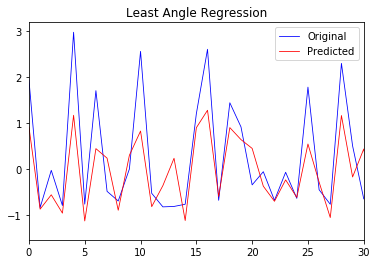

In [158]:
model = model_lar.fit(train_norm_x, train_norm_y)
ypred = model.predict(test_norm_x)
score = model.score(test_norm_x, test_norm_y)
mse = mean_squared_error(test_norm_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
x_ax = range(len(test_norm_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim (0,30)
plt.legend()
plt.title("Least Angle Regression")
plt.show()

In [159]:
model_ARD = linear_model.ARDRegression()

In [160]:
model_ARD.fit(train_norm_x, train_norm_y)
ypred=model_ARD.predict(test_norm_x)
#print ('Coefficients: ', neigh.coef_)
print('Variance score: %.2f' % model_ARD.score(x_norm, y_norm))
print('Variance score: %.2f' % model_ARD.score(train_norm_x, train_norm_y))
print('Variance score: %.2f' % model_ARD.score(test_norm_x, test_norm_y))
print('R2 Score: %.2f' % r2_score(test_norm_y, ypred))

Variance score: 0.85
Variance score: 0.86
Variance score: 0.82
R2 Score: 0.82


R2:0.821, MSE:0.24, RMSE:0.49


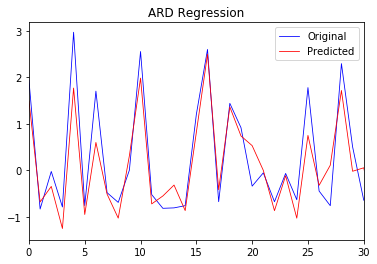

In [161]:
model = model_ARD.fit(train_norm_x, train_norm_y)
ypred = model.predict(test_norm_x)
score = model.score(test_norm_x, test_norm_y)
mse = mean_squared_error(test_norm_y, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
x_ax = range(len(test_norm_x))
#plt.scatter(x_ax, test_y, s=5, color="blue", label="original")
plt.plot(x_ax, test_norm_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim (0,30)
plt.legend()
plt.title("ARD Regression")
plt.show()

In [162]:
print("R Square value for Simple Regression Training data is ",np.round(lm.score(train_x, train_y)*100,2))
print("R Square value for Lasso Regression Training data is ",np.round(lm_lasso.score(train_x, train_y)*100,2))
print("R Square value for Ridge Regression Training data is ",np.round(lm_ridge.score(train_x, train_y)*100,2))
print("R Square value for Elastic Net Regression Training data is ",np.round(lm_elastic.score(train_x, train_y)*100,2))
print("R Square value for K Nearest Neighbor Regression Training data is ",np.round(neigh.score(train_x, train_y)*100,2))
print("R Square value for Least Angle Regression Training data is ",np.round(model_lar.score(train_norm_x, train_norm_y)*100,2))
print("R Square value for ARD Regression Training data is ",np.round(model_ARD.score(train_norm_x, train_norm_y)*100,2))

R Square value for Simple Regression Training data is  89.07
R Square value for Lasso Regression Training data is  78.16
R Square value for Ridge Regression Training data is  89.04
R Square value for Elastic Net Regression Training data is  82.61
R Square value for K Nearest Neighbor Regression Training data is  73.46
R Square value for Least Angle Regression Training data is  64.98
R Square value for ARD Regression Training data is  86.34


In [163]:
print("R Square value for Simple Regression Test data is ",np.round(lm.score(test_x, test_y)*100,2))
print("R Square value for Lasso Regression Test data is ",np.round(lm_lasso.score(test_x, test_y)*100,2))
print("R Square value for Ridge Regression Test data is ",np.round(lm_ridge.score(test_x, test_y)*100,2))
print("R Square value for Elastic Net Regression Test data is ",np.round(lm_elastic.score(test_x, test_y)*100,2))
print("R Square value for K Nearest Neighbor Regression Test data is ",np.round(neigh.score(test_x, test_y)*100,2))
print("R Square value for Least Angle Regression Test data is ",np.round(model_lar.score(test_norm_x, test_norm_y)*100,2))
print("R Square value for ARD Regression Test data is ",np.round(model_ARD.score(test_norm_x, test_norm_y)*100,2))

R Square value for Simple Regression Test data is  66.28
R Square value for Lasso Regression Test data is  49.94
R Square value for Ridge Regression Test data is  66.69
R Square value for Elastic Net Regression Test data is  53.38
R Square value for K Nearest Neighbor Regression Test data is  41.74
R Square value for Least Angle Regression Test data is  58.46
R Square value for ARD Regression Test data is  82.13


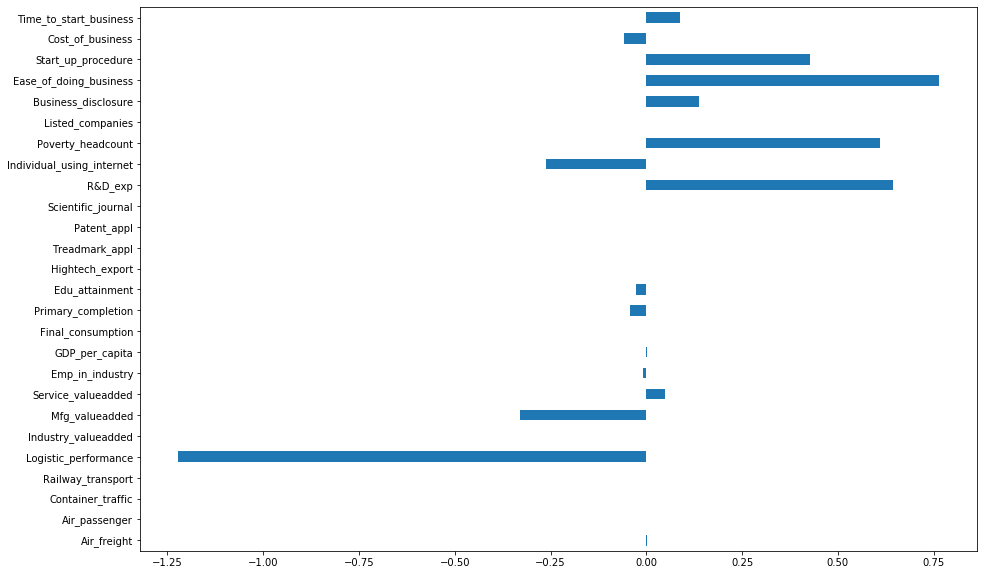

In [164]:
plt.figure(figsize=(15,10))
ft_importance_lm=pd.Series(lm.coef_,index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.show()

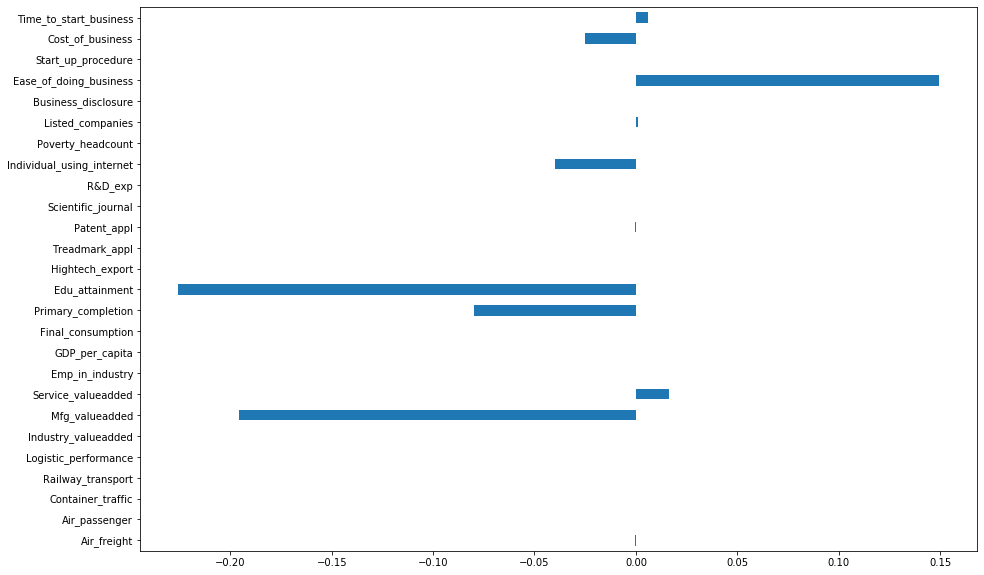

In [165]:
plt.figure(figsize=(15,10))
ft_importance_lm_lasso=pd.Series(lm_lasso.coef_,index=x.columns)
ft_importance_lm_lasso.plot(kind='barh')
plt.show()

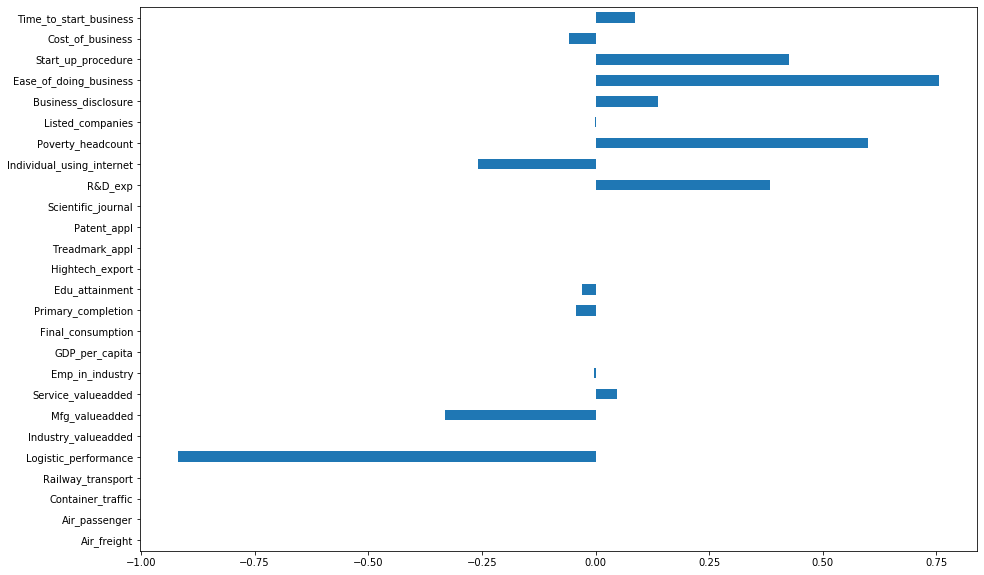

In [166]:
plt.figure(figsize=(15,10))
ft_importance_lm_ridge=pd.Series(lm_ridge.coef_,index=x.columns)
ft_importance_lm_ridge.plot(kind='barh')
plt.show()

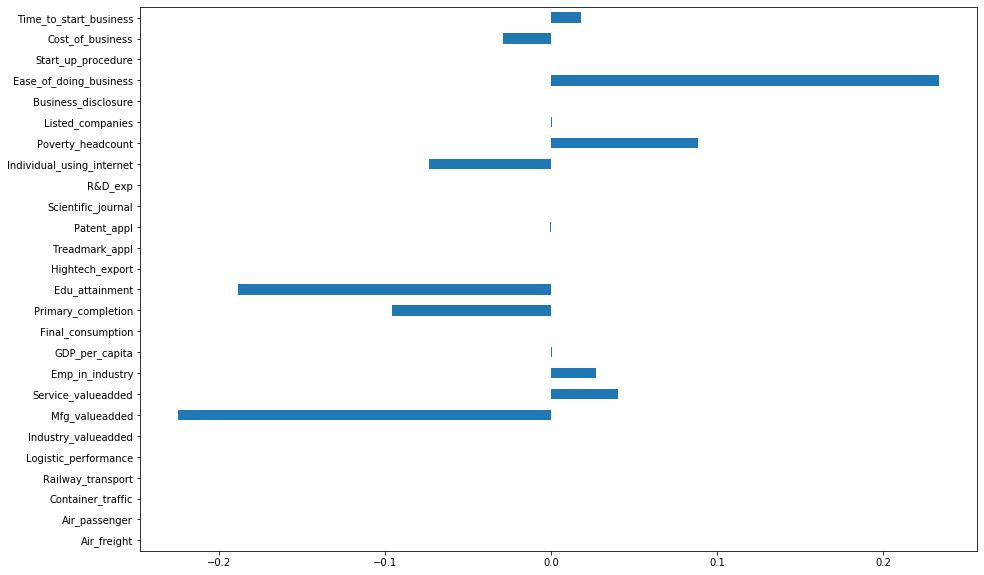

In [167]:
plt.figure(figsize=(15,10))
ft_importance_lm_elastic=pd.Series(lm_elastic.coef_,index=x.columns)
ft_importance_lm_elastic.plot(kind='barh')
plt.show()

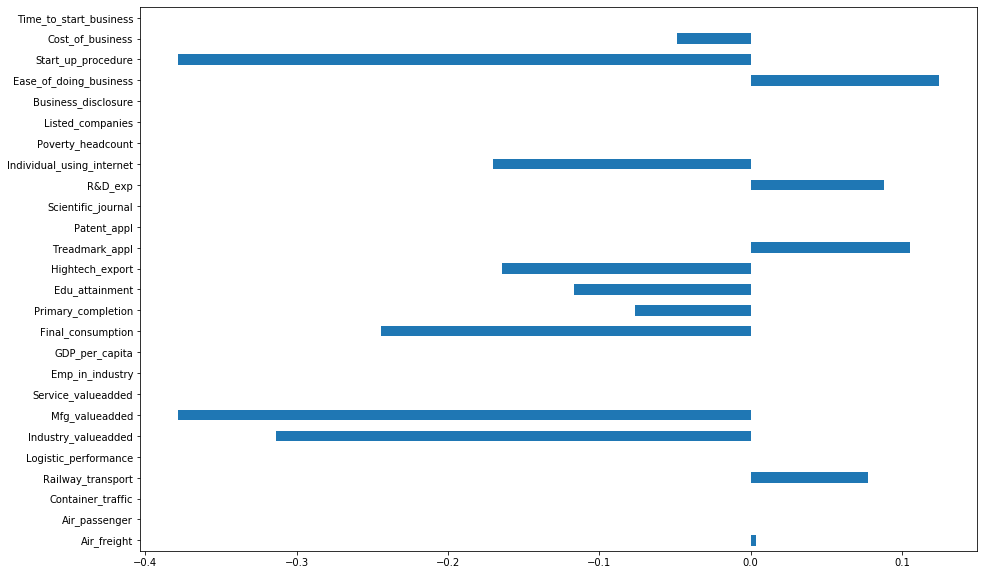

In [168]:
plt.figure(figsize=(15,10))
ft_importance_lm_LAR=pd.Series(model_lar.coef_,index=x.columns)
ft_importance_lm_LAR.plot(kind='barh')
plt.show()

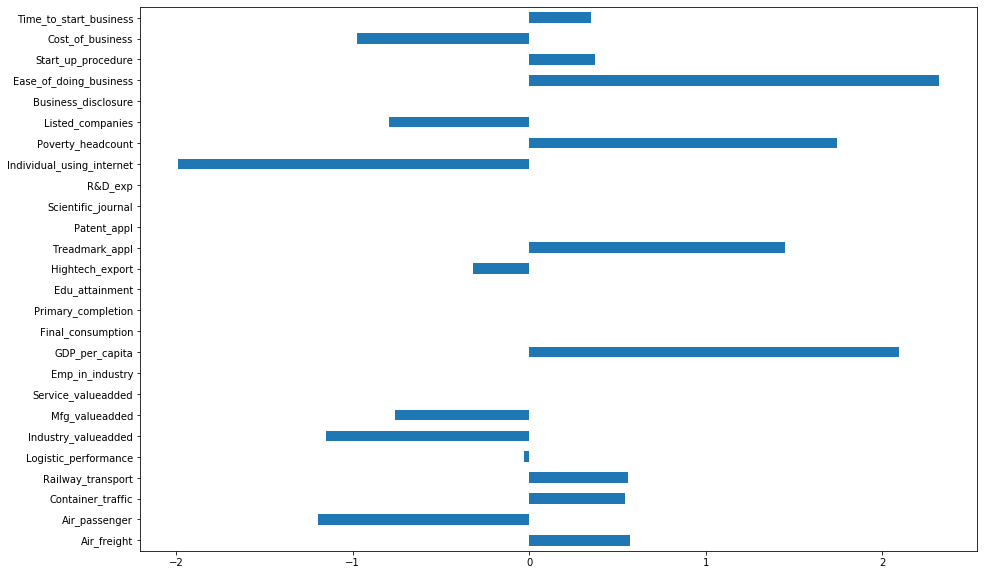

In [169]:
plt.figure(figsize=(15,10))
ft_importance_lm_ARD=pd.Series(model_ARD.coef_,index=x.columns)
ft_importance_lm_ARD.plot(kind='barh')
plt.show()

In [170]:
x_norm = (x - x.mean()) / x.std()

In [171]:
y_norm = (y - y.mean()) / y.std()

In [172]:
train_x,test_x,train_y,test_y=train_test_split(x_norm,y_norm,test_size=0.3,random_state=50)

In [173]:
regressor = DecisionTreeRegressor(random_state=0)

In [174]:
regressor.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [175]:
ypred = regressor.predict(test_x)
score_train = regressor.score(train_x, train_y)
score_test = regressor.score(test_x, test_y)
print("R Square value for Decision Tree Regression Training data is ",(score_train))
print("R Square value for Decision Tree Regression Test data is ",(score_test))
print("R Square value for Decision Tree Regression Test data is ",(r2_score(test_y, ypred)))

R Square value for Decision Tree Regression Training data is  0.999999997921373
R Square value for Decision Tree Regression Test data is  0.6123506721820691
R Square value for Decision Tree Regression Test data is  0.6123506721820691


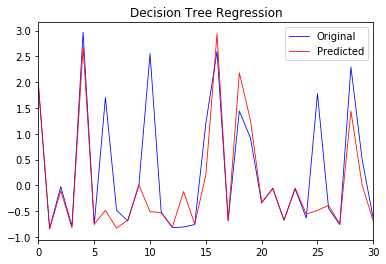

In [176]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Decision Tree Regression")
plt.show()

In [177]:
predictions = regressor.predict(test_x)

In [178]:
errors = abs(predictions - test_y)

In [179]:
print('Mean Absolute Error:', round(np.mean(errors), 2), )

Mean Absolute Error: 0.34


In [180]:
cross_val_score(regressor, x, y, cv=10)

array([-2.71919426,  0.58992652, -5.03141288,  0.72937174, -2.28263315,
       -4.58739144, -0.02249124, -3.40181659,  0.63726586, -1.90308587])

In [181]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 110.43 %.


In [182]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor( n_estimators = 100, random_state = 0)
# Train the model on training data
rf.fit(train_x, train_y);

In [183]:
ypred = rf.predict(test_x)
score_train = rf.score(train_x, train_y)
score_test = rf.score(test_x, test_y)
print("R Square value for Random Forest Regression Training data is ",(score_train))
print("R Square value for Random Forest Regression Test data is ",(score_test))
print("R Square value for Random Forest Regression Test data is ",(r2_score(test_y, ypred)))

R Square value for Random Forest Regression Training data is  0.9790061899297694
R Square value for Random Forest Regression Test data is  0.8036751154843155
R Square value for Random Forest Regression Test data is  0.8036751154843155


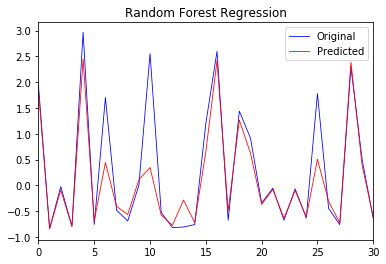

In [184]:
x_ax = range(len(test_x))
plt.plot(x_ax, test_y, lw=0.8, color="blue", label="Original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="Predicted")
plt.xlim(0,30)
plt.legend()
plt.title("Random Forest Regression")
plt.show()

In [185]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2),)

Mean Absolute Error: 0.27


In [186]:
cross_val_score(rf, x, y, cv=10)

array([ -2.27780311,   0.56668245, -53.25664008,  -0.42309511,
         0.58810773, -21.73525144,   0.41155707,  -1.21666822,
         0.63157249,  -1.41407006])

In [187]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.39 %.
